# IPL Match Analysis

import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load Datasets

In [2]:
deliveries = pd.read_csv('deliveries.csv')
m1 = pd.read_csv('matches.csv')

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
m1.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
m1

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
deliveries.shape

(179078, 21)

In [8]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [11]:
m1.shape

(756, 18)

In [12]:
m1.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
m1.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


### QUESTION1 : WHO WILL WIN THE MATCH? A) MI B)DC

Obtaining all game statistics of Mi vs DC

In [15]:
midc = m1.loc[((m1['team1'] == 'Mumbai Indians') | (m1['team1'] == 'Delhi Capitals')) & 
              ((m1['team2'] == 'Delhi Capitals') | (m1['team2'] == 'Mumbai Indians'))]
midc

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
698,11139,IPL-2019,Mumbai,24-03-2019,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
729,11325,IPL-2019,Delhi,18-04-2019,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary


In [16]:
result = pd.DataFrame({'team1' : midc['team1'], 'team2' : midc['team2'], 'winner' : midc['winner']})
result

,team1,team2,winner
698,Delhi Capitals,Mumbai Indians,Delhi Capitals
729,Mumbai Indians,Delhi Capitals,Mumbai Indians


So we are having only 2 matches in which Mumbai Indians played with Delhi Capitals
And both teams have won once 

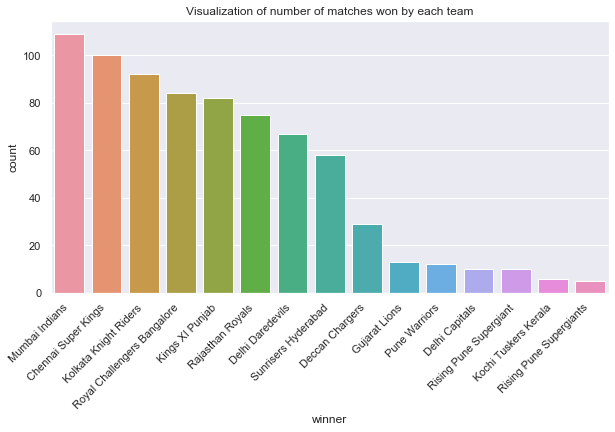

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='winner', data=m1, order = m1['winner'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#plt.tight_layout()
plt.title('Visualization of number of matches won by each team')
plt.show()

From the above bar chart we can see that MI has more wins than compared to DC and individually they have equal number of wins against each other.
So we can conclude that MI Can be winner as it has more number of wins.

### QUESTION2 : WHAT WILL THE TOSSING WINNING CAPTAIN WILL DECIDE TO DO FIRST? A) BAT B)BALL

So lets load the toss related data for MI and DC

In [18]:
a = m1.loc[(m1['team1'] == 'Mumbai Indians')]
b = m1.loc[(m1['team1'] == 'Delhi Capitals')]
c = m1.loc[(m1['team2'] == 'Mumbai Indians')]
d = m1.loc[(m1['team2'] == 'Delhi Capitals')]

#print(a.head())
#print(b.head())
#print(c.head())
#print(d.head())

a.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
23,24,IPL-2017,Mumbai,22-04-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
46,47,IPL-2017,Hyderabad,08-05-2017,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
52,53,IPL-2017,Kolkata,13-05-2017,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN


In [19]:
a1 = pd.DataFrame({'team' : a['team1'],'toss_winner' : a['toss_winner'], 'toss_decision' : a['toss_decision']})
b1 = pd.DataFrame({'team' : b['team1'],'toss_winner' : b['toss_winner'], 'toss_decision' : b['toss_decision']})
c1 = pd.DataFrame({'team' : c['team2'],'toss_winner' : c['toss_winner'], 'toss_decision' : c['toss_decision']})
d1 = pd.DataFrame({'team' : d['team2'],'toss_winner' : d['toss_winner'], 'toss_decision' : d['toss_decision']})

In [20]:
frames = [a1,b1,c1,d1]

toss = pd.concat(frames)

In [21]:
toss

,team,toss_winner,toss_decision
1,Mumbai Indians,Rising Pune Supergiant,field
23,Mumbai Indians,Delhi Daredevils,field
43,Mumbai Indians,Delhi Daredevils,field
46,Mumbai Indians,Mumbai Indians,bat
52,Mumbai Indians,Kolkata Knight Riders,field
...,...,...,...
732,Delhi Capitals,Delhi Capitals,field
735,Delhi Capitals,Delhi Capitals,field
745,Delhi Capitals,Delhi Capitals,field
748,Delhi Capitals,Rajasthan Royals,bat


In [22]:
toss['team'].unique()

array(['Mumbai Indians', 'Delhi Capitals'], dtype=object)

In [23]:
toss['toss_winner'].value_counts()

Mumbai Indians                 100
Rajasthan Royals                14
Chennai Super Kings             14
Delhi Daredevils                14
Kolkata Knight Riders           10
Delhi Capitals                  10
Royal Challengers Bangalore      9
Deccan Chargers                  8
Sunrisers Hyderabad              8
Kings XI Punjab                  8
Gujarat Lions                    3
Pune Warriors                    3
Kochi Tuskers Kerala             1
Rising Pune Supergiant           1
Name: toss_winner, dtype: int64

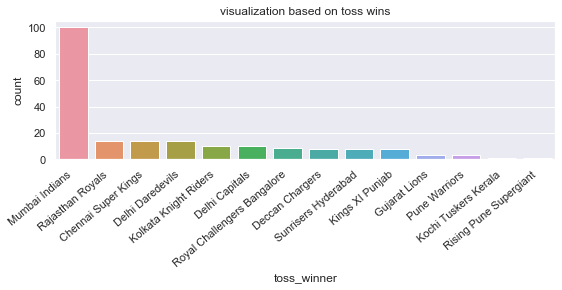

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='toss_winner',data=toss,order = toss['toss_winner'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('visualization based on toss wins')
plt.show()

In [25]:
toss

,team,toss_winner,toss_decision
1,Mumbai Indians,Rising Pune Supergiant,field
23,Mumbai Indians,Delhi Daredevils,field
43,Mumbai Indians,Delhi Daredevils,field
46,Mumbai Indians,Mumbai Indians,bat
52,Mumbai Indians,Kolkata Knight Riders,field
...,...,...,...
732,Delhi Capitals,Delhi Capitals,field
735,Delhi Capitals,Delhi Capitals,field
745,Delhi Capitals,Delhi Capitals,field
748,Delhi Capitals,Rajasthan Royals,bat


In [26]:
toss['toss_decision'].value_counts()

field    123
bat       80
Name: toss_decision, dtype: int64

From the above data we can say that field was chosen most of times when toss was won.

## QUESTION 3: HOW MANY RUNS WILL ROHITH SHARMA SCORE?

In [27]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
deliveries['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [29]:
Rohit = deliveries.loc[deliveries['batsman'] == 'R Sharma']
Rohit

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
45930,195,1,Deccan Chargers,Rajasthan Royals,19,1,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
45931,195,1,Deccan Chargers,Rajasthan Royals,19,2,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
45932,195,1,Deccan Chargers,Rajasthan Royals,19,3,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
45933,195,1,Deccan Chargers,Rajasthan Royals,19,4,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
45934,195,1,Deccan Chargers,Rajasthan Royals,19,5,R Sharma,RG Sharma,S Narwal,0,...,0,0,0,0,0,0,0,R Sharma,caught,AA Jhunjhunwala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93597,395,2,Pune Warriors,Mumbai Indians,20,4,R Sharma,B Kumar,KA Pollard,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
93598,395,2,Pune Warriors,Mumbai Indians,20,5,R Sharma,B Kumar,KA Pollard,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
95322,402,2,Pune Warriors,Sunrisers Hyderabad,19,5,R Sharma,MK Pandey,A Mishra,0,...,0,0,0,0,0,0,0,R Sharma,bowled,NaN
100161,422,2,Pune Warriors,Chennai Super Kings,20,3,R Sharma,B Kumar,DJ Bravo,0,...,0,0,0,0,0,0,0,R Sharma,caught,SK Raina


In [30]:
Rohit['total_runs'].sum()

71

In [31]:
Runs_per_match = Rohit.groupby('match_id')['total_runs'].sum()

In [32]:
Runs_per_match

match_id
195    10
207     5
229    14
233     0
244    12
254    13
262     1
271     0
277     0
315     0
321     2
362     1
365     1
384     0
387     1
395    10
402     0
422     0
426     1
Name: total_runs, dtype: int64

In [33]:
Rsharma_runs = pd.DataFrame({'Runs per match' : Runs_per_match})

In [34]:
Rsharma_runs

,Runs per match
match_id,
195,10
207,5
229,14
233,0
244,12
254,13
262,1
271,0
277,0


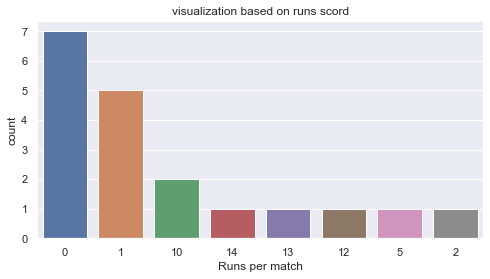

In [35]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Runs per match',data=Rsharma_runs,order = Rsharma_runs['Runs per match'].value_counts().index)


plt.title('visualization based on runs scord')
plt.show()

In [36]:
Rsharma_runs.describe()

,Runs per match
count,19.000000
mean,3.736842
std,5.151506
min,0.000000
25%,0.000000
50%,1.000000
75%,7.500000
max,14.000000


From the above work, we can conclude that Rohit sharma has scored more than 7.5 runs in 75% of cases. So I would conclude that he will score in range of 0-15 runs

## QUESTION 4: HOW MANY WICKETS WILL KAGISO RABADA TAKES IN THIS MATCH 

In [37]:
deliveries['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [38]:
rabada = deliveries.loc[deliveries['bowler'] == 'K Rabada']
rabada

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Daredevils,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Daredevils,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Daredevils,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Daredevils,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Daredevils,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175903,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,3,Washington Sundar,MP Stoinis,K Rabada,0,...,0,0,0,0,0,0,0,Washington Sundar,caught,SS Iyer
175904,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,4,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175905,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,5,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175906,11337,2,Royal Challengers Bangalore,Delhi Capitals,20,6,MP Stoinis,UT Yadav,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [39]:
rabada = rabada.dropna(axis=0)
rabada

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5632,24,1,Mumbai Indians,Delhi Daredevils,19,7,HH Pandya,Harbhajan Singh,K Rabada,0,...,0,0,0,0,0,0,0,Harbhajan Singh,run out,K Rabada
9482,41,1,Gujarat Lions,Delhi Daredevils,2,1,BB McCullum,DR Smith,K Rabada,0,...,0,0,0,0,0,0,0,BB McCullum,caught,RR Pant
9483,41,1,Gujarat Lions,Delhi Daredevils,2,2,SK Raina,DR Smith,K Rabada,0,...,0,0,0,0,0,0,0,DR Smith,run out,S Nadeem
9589,41,1,Gujarat Lions,Delhi Daredevils,19,3,AJ Finch,RA Jadeja,K Rabada,0,...,0,0,0,0,0,0,0,AJ Finch,caught,RR Pant
10290,44,1,Mumbai Indians,Delhi Daredevils,16,3,RG Sharma,KA Pollard,K Rabada,0,...,0,0,0,0,0,0,0,RG Sharma,caught,A Mishra
165433,11139,2,Mumbai Indians,Delhi Capitals,17,3,BCJ Cutting,Yuvraj Singh,K Rabada,0,...,0,0,0,0,0,0,0,BCJ Cutting,caught,RR Pant
165446,11139,2,Mumbai Indians,Delhi Capitals,19,3,Yuvraj Singh,MJ McClenaghan,K Rabada,0,...,0,0,0,0,0,0,0,Yuvraj Singh,caught,R Tewatia
165948,11141,2,Chennai Super Kings,Delhi Capitals,20,1,KM Jadhav,MS Dhoni,K Rabada,0,...,0,0,0,0,0,0,0,KM Jadhav,caught,RR Pant
166978,11146,1,Kolkata Knight Riders,Delhi Capitals,7,5,CA Lynn,N Rana,K Rabada,0,...,0,0,0,0,0,0,0,CA Lynn,caught,RR Pant
167060,11146,1,Kolkata Knight Riders,Delhi Capitals,20,6,PP Chawla,Kuldeep Yadav,K Rabada,0,...,0,0,0,0,1,0,1,PP Chawla,run out,S Dhawan


In [40]:
Wick_per_match = rabada.groupby('match_id')['player_dismissed'].count()

In [41]:
Wick_per_match

match_id
24       1
41       3
44       1
11139    2
11141    1
11146    2
11149    3
11152    1
11311    4
11317    2
11321    3
11325    2
11328    2
11331    1
11337    2
Name: player_dismissed, dtype: int64

In [42]:
Ans_df = pd.DataFrame({'Wickets per match' : Wick_per_match})
Ans_df

,Wickets per match
match_id,
24,1
41,3
44,1
11139,2
11141,1
11146,2
11149,3
11152,1
11311,4


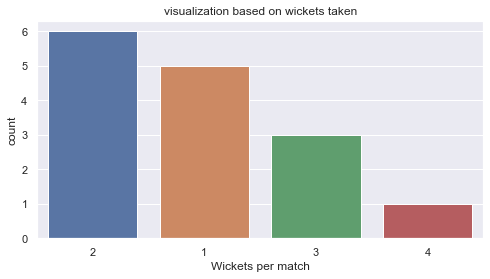

In [43]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Wickets per match',data=Ans_df,order = Ans_df['Wickets per match'].value_counts().index)

plt.title('visualization based on wickets taken')
plt.show()

In [44]:
Ans_df.describe()

,Wickets per match
count,15.00000
mean,2.00000
std,0.92582
min,1.00000
25%,1.00000
50%,2.00000
75%,2.50000
max,4.00000


From the above analysis, we can find that Rabada has taken more than 2 wickets in 75% of cases.
So i can conclude that he will take minimum 2 wickets in the match

### QUESTION 5: HOW MANY WIDES WILL BE BOWLED IN TODAYS MATCH?

In [45]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [46]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [47]:
MI = deliveries.loc[deliveries['bowling_team'] == 'Mumbai Indians']
DC = deliveries.loc[deliveries['bowling_team'] == 'Delhi Capitals']

In [48]:
MI

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
373,2,2,Rising Pune Supergiant,Mumbai Indians,1,1,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
374,2,2,Rising Pune Supergiant,Mumbai Indians,1,2,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
375,2,2,Rising Pune Supergiant,Mumbai Indians,1,3,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
376,2,2,Rising Pune Supergiant,Mumbai Indians,1,4,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
377,2,2,Rising Pune Supergiant,Mumbai Indians,1,5,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [49]:
DC

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165332,11139,2,Mumbai Indians,Delhi Capitals,1,1,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165333,11139,2,Mumbai Indians,Delhi Capitals,1,2,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165334,11139,2,Mumbai Indians,Delhi Capitals,1,3,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165335,11139,2,Mumbai Indians,Delhi Capitals,1,4,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165336,11139,2,Mumbai Indians,Delhi Capitals,1,5,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [50]:
MI = MI.groupby('match_id')['wide_runs'].sum()
DC = DC.groupby('match_id')['wide_runs'].sum()

In [51]:
MI

match_id
2        3
7        5
10       5
12       3
16       8
        ..
11338    5
11342    2
11347    7
11412    1
11415    4
Name: wide_runs, Length: 187, dtype: int64

In [52]:
DC

match_id
11139    7
11141    1
11146    3
11149    8
11152    3
11311    3
11317    3
11321    4
11325    3
11328    2
11331    4
11337    2
11341    5
11344    9
11413    6
11414    6
Name: wide_runs, dtype: int64

In [53]:
MI_wides = pd.DataFrame({'Total wides' : MI})
DC_wides = pd.DataFrame({'Total wides' : DC})

In [54]:
MI_wides

,Total wides
match_id,
2,3
7,5
10,5
12,3
16,8
...,...
11338,5
11342,2
11347,7


In [55]:
DC_wides

,Total wides
match_id,
11139,7
11141,1
11146,3
11149,8
11152,3
11311,3
11317,3
11321,4
11325,3


In [56]:
MI_wides.describe()

,Total wides
count,187.000000
mean,4.770053
std,2.981225
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,15.000000


In [57]:
DC_wides.describe()

,Total wides
count,16.000000
mean,4.312500
std,2.301268
min,1.000000
25%,3.000000
50%,3.500000
75%,6.000000
max,9.000000


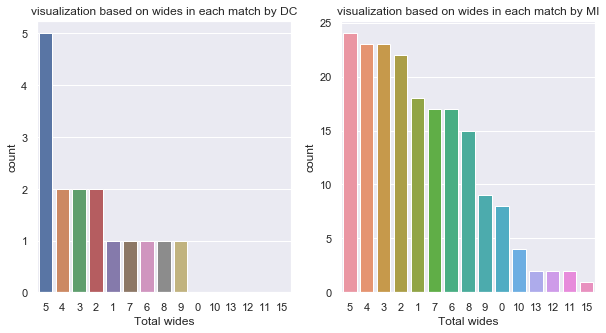

In [58]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

ax1 = sns.countplot(ax=axes[0],x='Total wides',data=DC_wides,order = DC_wides['Total wides'].value_counts().index)
ax1.set_title('visualization based on wides in each match by DC')
ax2 = sns.countplot(ax=axes[1],x='Total wides',data=MI_wides,order = MI_wides['Total wides'].value_counts().index)
ax2.set_title('visualization based on wides in each match by MI')
plt.show()

From the above analysis, I can say that Mumbai Indians have bowled 7 wides in 75% of matches and when it comes to DC they have bowled 6 wides in 75% of matches.
So i can conclude that In today's match there will be minimum 6 wides

## End of Day-1